## Starting Off:


Discuss with a partner what the goal is of fitting a linear regression model. 


In [1]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

# Better Modelling with Data transformations

<img src="slr_assumptions.jpg" style="width:600px;">

### Assumptions for Simple Linear Regression
1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

## Data Preparation

This consists of cleaning up and modifying your current variables to make them more usable within the model.  This could include:

- Changing the data type to something usable. 
    - *Converting a string '3' to float 3*
    - *Creating dummy variables*
    - *Converting a time date stamp to a usable format
- Removing outliers
- Handling missing data
    - Removing observations with missing data points.
    - Substituting in another value for the missing value.
    

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-6/multiple_linear_regression/cleaned_movie_data.csv',index_col=0)


Previously we've dealt with the date of year built by subtracting the year this data was released to create a column showing how many years old the data is.  

In [3]:
df['yr_old'] =  df['title_year'].map(lambda x: 2016-x )

In [4]:
df = df[df['yr_old']<20]

In [5]:
df = df[df['budget']<300000000]

In [6]:
df = df[(df['gross']>1500000) & (df['gross']<500000000)]

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is to :
- answer questions, test business assumptions, generate hypotheses for further analysis
- prepare the data for modeling 

The thing that these two probably have in common is a good knowledge of your data to either get the answers that you need or to develop an intuition for interpreting the results of future 
modeling.

There are a lot of ways to reach these goals: you can get a basic description of the data, visualize it, identify patterns in it, identify challenges of using the data, etc.

In [7]:
df['gross'].describe()

count    2.852000e+03
mean     5.680368e+07
std      6.776701e+07
min      1.506998e+06
25%      1.340168e+07
50%      3.384416e+07
75%      7.136619e+07
max      4.745447e+08
Name: gross, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffe8dbbe1d0>]],
      dtype=object)

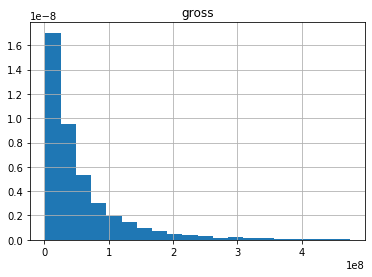

In [8]:
df.hist(column=['gross'], bins=20, density =True)

In [9]:
features =  ['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'yr_old']

In [10]:
df[features].dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
yr_old                       float64
dtype: object

In [11]:
#sns.pairplot(df, diag_kind="kde", height=2.5)

In [12]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

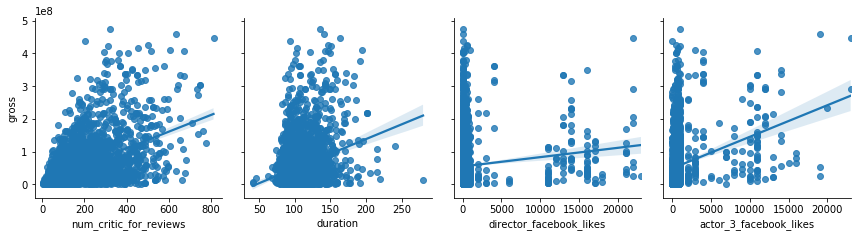

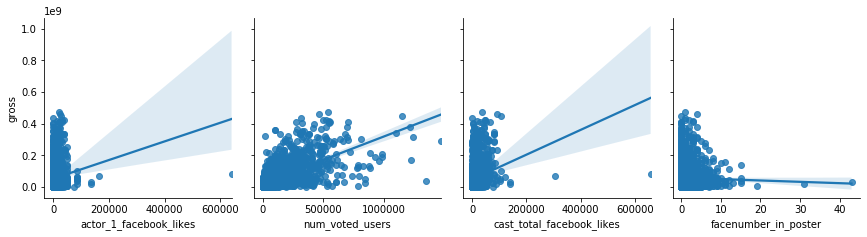

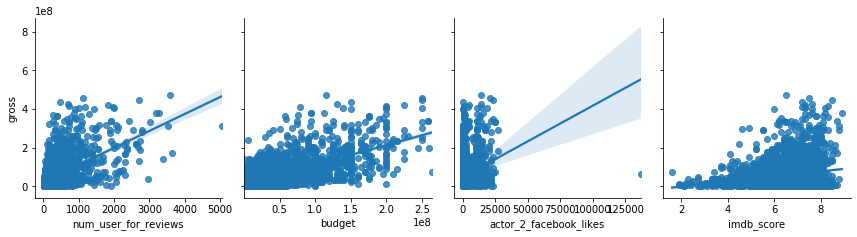

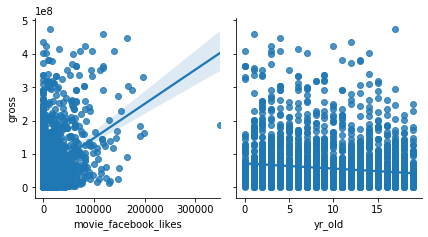

In [13]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

In [14]:
df['actor_1_facebook_likes'].describe()

count      2852.000000
mean       8405.122721
std       16434.369153
min           0.000000
25%         826.750000
50%        2000.000000
75%       13000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [15]:
df.shape

(2852, 33)

In [16]:
df = df[df['actor_1_facebook_likes']<630000]

In [17]:
df.shape

(2851, 33)

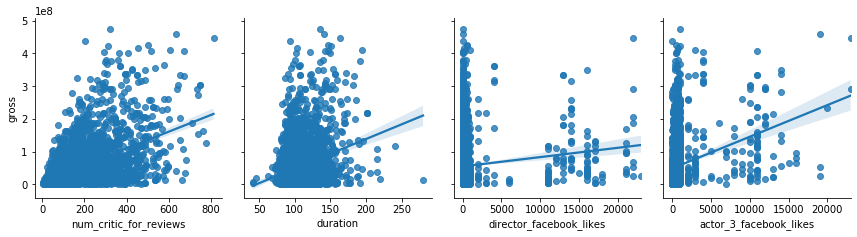

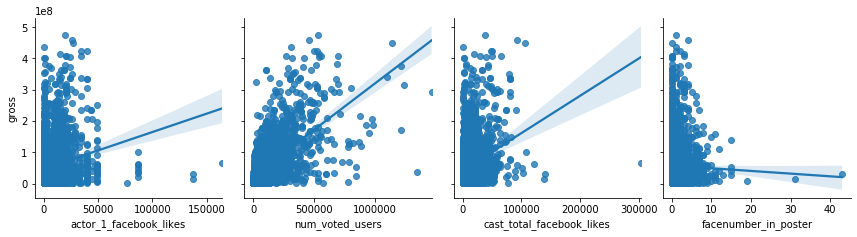

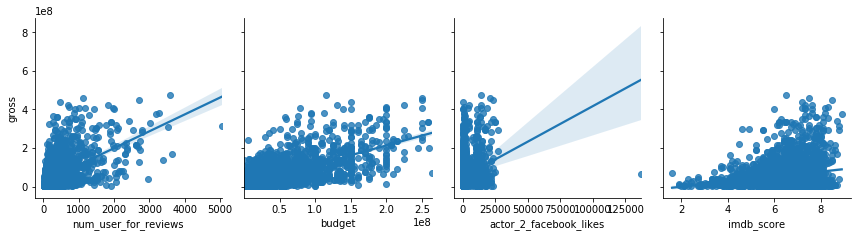

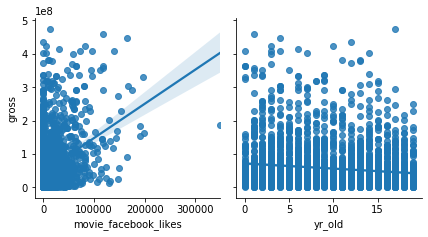

In [18]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

In [19]:
features

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'yr_old']

In [20]:
subset = ['budget', 'cast_total_facebook_likes', 'director_facebook_likes', "yr_old"]

In [21]:
from statsmodels.formula.api import ols

lr_model = ols(formula='gross~budget + cast_total_facebook_likes + director_facebook_likes + yr_old', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     618.7
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:28:43   Log-Likelihood:                -54561.
No. Observations:                2851   AIC:                         1.091e+05
Df Residuals:                    2846   BIC:                         1.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  8.201e+06   2.33e+06      3.516      0.000    3.63e+06    1.28e+07
budget                        0.9648      0.022     44.287      0.000       0.922       1.008
cast_total_facebook_likes   429.7133     60.138      7.145      0.000     311.794     547.632
director_facebook_likes     826.4143    321.727      2.569      0.010     195.572    1457.256
yr_old                    -1.987e+05   1.76e+05     -1.132      0.258   -5.43e+05    1.46e+05
==============================================================================
Omnibus:                     1098.056   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6888.781
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                       9.817   Cond. No.                     1.62e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Working with SKlearn

In [22]:
df[subset]

,budget,cast_total_facebook_likes,director_facebook_likes,yr_old
2,245000000.0,11700,0.0,1.0
3,250000000.0,106759,22000.0,4.0
5,263700000.0,1873,475.0,4.0
6,258000000.0,46055,0.0,9.0
7,260000000.0,2036,15.0,6.0
...,...,...,...,...
4971,15000000.0,3861,29.0,7.0
4973,60000.0,2065,0.0,18.0
4977,65000.0,0,293.0,12.0
5011,25000.0,254,119.0,19.0


In [23]:
# fit a model
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df[subset], df['gross'])


print(lm.intercept_)
print(lm.coef_)

8201481.561480783
[ 9.64828961e-01  4.29713315e+02  8.26414307e+02 -1.98740718e+05]


In [24]:
y_pred = lm.predict(df[subset])

In [25]:
y_pred

array([2.49413482e+08, 3.12670638e+08, 2.63029316e+08, ...,
       6.12144622e+06, 4.65701913e+06, 4.25739015e+07])

Text(0, 0.5, 'Predictions')

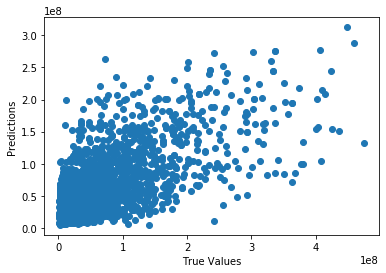

In [26]:
## The line / model
plt.scatter( df['gross'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Assumptions for Simple Linear Regression
1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

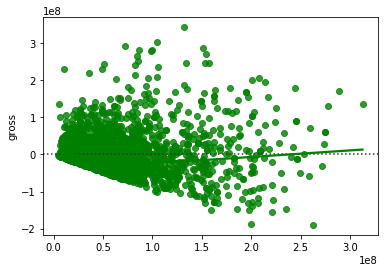

In [27]:
sns.residplot(y_pred, df['gross'], lowess=True, color="g")

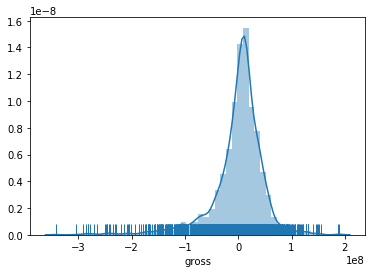

In [28]:
sns.distplot((y_pred- df['gross']), kde=True, rug=True);

## Capturing Non-linear relationships



We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

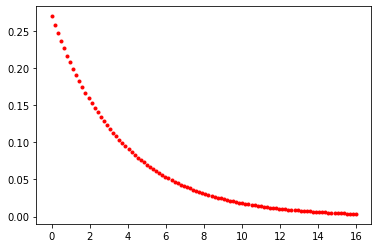

In [29]:
x = np.linspace(0, 16, 100)
Y = [0.27*exp(-0.27*_) for _ in x]
# error = norm.rvs(0, scale=0.03, size=100)
# simulated_data = [max(0, y+e) for (y,e) in zip(Y,error)]

# plt.plot(x, Y, 'b-')
plt.plot(x, Y, 'r.')
plt.show()

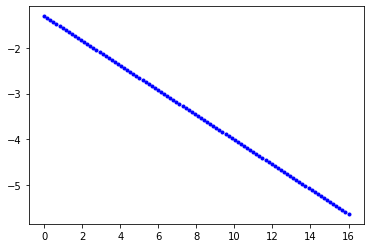

In [30]:
plt.plot(x, np.log(Y), 'b.')
plt.show()

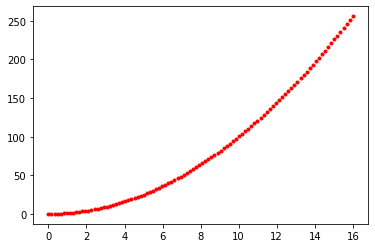

In [31]:
y = x*x

plt.plot(x, y, 'r.')
plt.show()


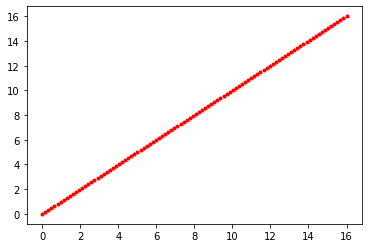

In [32]:
plt.plot(x,np.sqrt(y), 'r.')
plt.show()

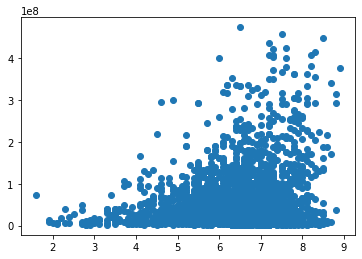

In [33]:
plt.scatter( df['imdb_score'], df['gross']);

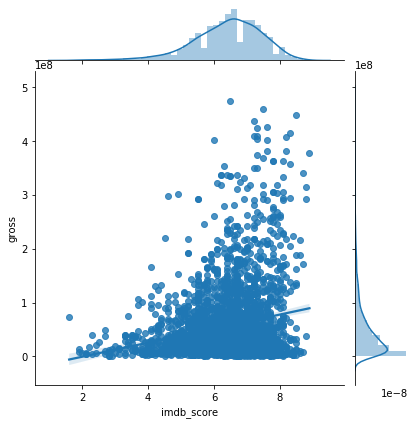

In [34]:
sns.jointplot(x="imdb_score", y="gross", data=df, kind="reg");


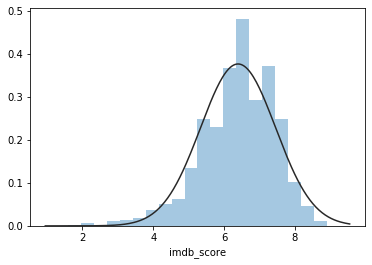

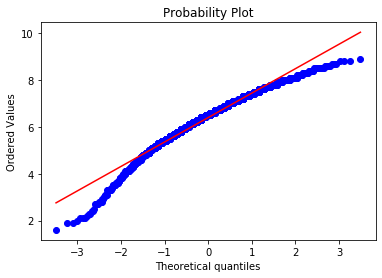

In [35]:


#histogram and normal probability plot
sns.distplot(df['imdb_score'], fit=norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df['imdb_score'], plot=plt)


In [36]:
df['gross_log'] = np.log(df['gross'])


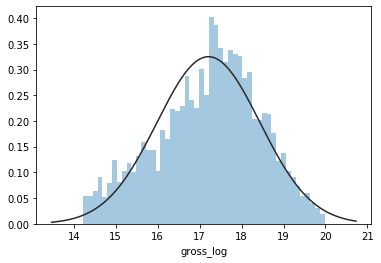

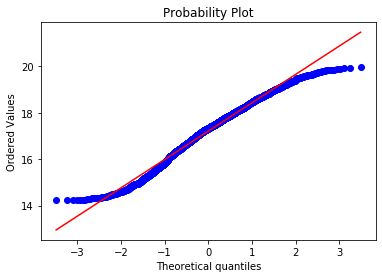

In [37]:
#transformed histogram and normal probability plot
sns.distplot(df['gross_log'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['gross_log'], plot=plt)

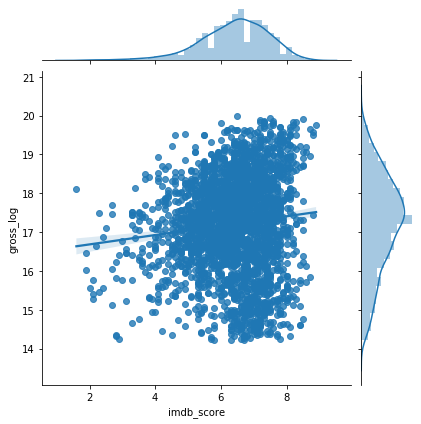

In [38]:
sns.jointplot(x="imdb_score", y="gross_log", data=df, kind="reg")

In [39]:
df['budget_log'] = np.log(df['budget'])


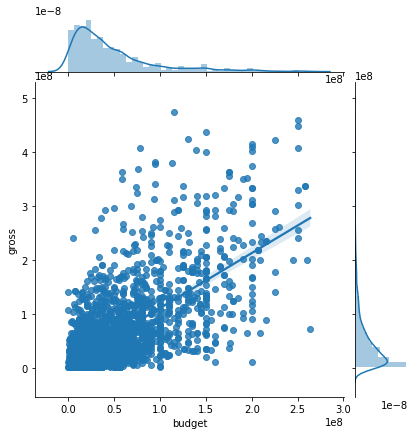

In [40]:
sns.jointplot(x="budget", y="gross", data=df, kind="reg")

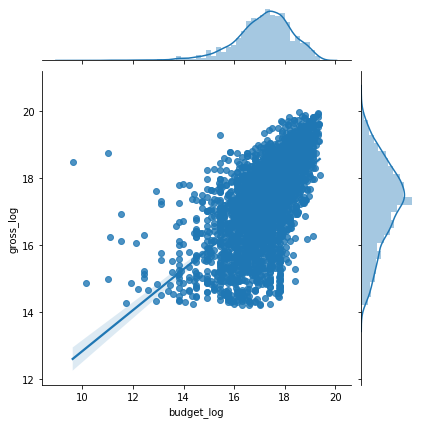

In [41]:
sns.jointplot(x="budget_log", y="gross_log", data=df, kind="reg")

***We can now use the natural log of price as our new target variable. We jsut need to undo this transformation after our predictions.***

`np.exp(df['gross_log']) `

https://stats.stackexchange.com/questions/260942/transforming-back-after-a-log-transformation

In [42]:
np.exp(df['gross_log']) 


2       2.000742e+08
3       4.481306e+08
5       7.305868e+07
6       3.365303e+08
7       2.008073e+08
            ...     
4971    3.272163e+07
4973    3.216970e+06
4977    1.152937e+07
5011    2.856622e+06
5012    1.049997e+07
Name: gross_log, Length: 2851, dtype: float64

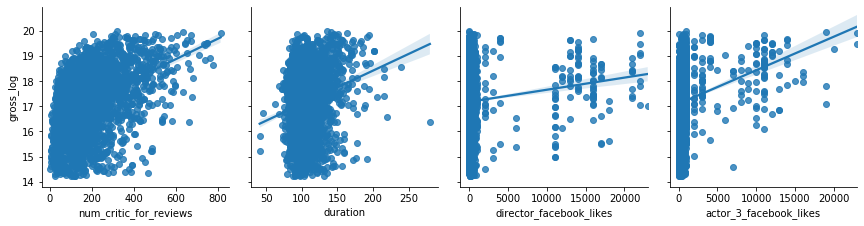

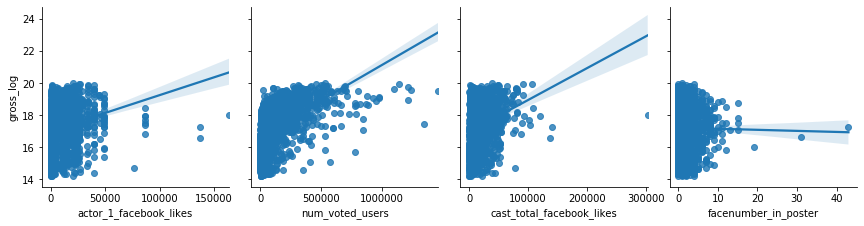

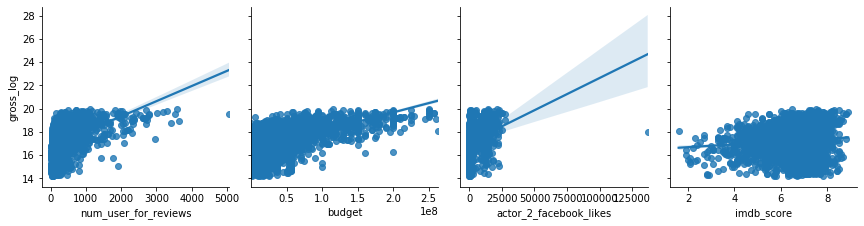

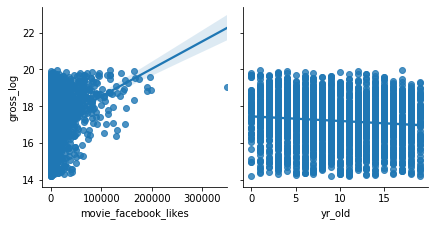

In [43]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross_log'],x_vars=i, kind="reg", height=3)

<img src='transformations.png'/>

## Polynomial Features 
<img src='noisy-sine-third-order-polynomial.png' width=500 />


Blog Explainaing polynomial features in more details.  

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**, what do you think is the relationship between temperature and Citibike rentals?

Is that relationship alwasy consistent?

**FYI** - You can use interactions for both continuous variables and categorical/dummy variables

**Question:** Thinking about the features that box office gross, what are two possible features that could be interacted with eachother to better show the relationship to the gross?

<img src="interactions.png" style="width:600px;">